In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy


Data = pd.read_csv("reddit_train.csv",sep=",",usecols=[1,2])
Data = Data.sample(frac=1).reset_index(drop=True)

Test = pd.read_csv("reddit_test.csv",sep=",")





Data.head(5)

,comments,subreddits
0,"lol? Messi is god for Argentina, not his fault...",soccer
1,I just played again yesterday after not playin...,Overwatch
2,I think the main problem is that people think ...,europe
3,My comment was based on the overall shit weath...,funny
4,"give em a chance, they always fight till the e...",nfl


In [2]:
Data.shape

(70000, 2)

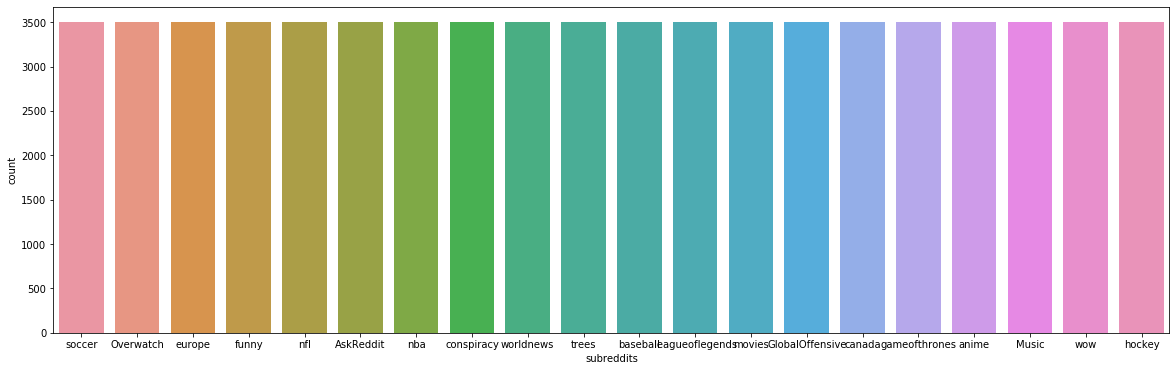

In [3]:
dims = (20, 6)
fig= plt.subplots(figsize=dims)
sb.countplot(x= 'subreddits' ,data=Data)

In [4]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords.add('url')
stopWords.add('user')
print(stopWords)


{'until', 'through', 'during', 'ours', 'once', 'did', 'in', 'why', "couldn't", 'haven', 'where', 'other', 'now', 'who', 'a', 'below', 'and', "needn't", 'does', 'most', 'then', 'than', "you'd", 'because', 's', 'or', "shan't", 'on', 'mustn', 'of', 't', 'her', 'those', 'when', 'for', 'she', 'should', 'hers', 'ain', 'hadn', 'aren', "haven't", 'am', 'before', 'each', 'itself', 'don', 'just', 'under', 'by', "shouldn't", 'not', 'so', 'with', 'needn', 'this', 'to', "didn't", 'will', 'yours', 'their', 'its', 'herself', 'whom', "you'll", 'these', "you're", 'an', "mightn't", 'i', 'more', 'theirs', 'can', 'myself', 'no', "hasn't", "it's", "wasn't", "she's", 'o', 'off', 'we', 'them', 'about', 'do', 'too', 're', 'down', "wouldn't", 'into', 'out', 'the', 'all', 'both', 'wasn', "isn't", 'm', 'url', 'if', 'such', "aren't", 'ma', 'nor', 'd', 'himself', 'has', 'after', 'while', 'same', 'doesn', 'it', 'very', 'up', 'at', 'isn', 'over', 'as', 'from', 'ourselves', "should've", 'that', 'couldn', 'only', 'his

In [5]:
from sklearn import preprocessing
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)
#This lemmatization part is inspired by 'Lemmatize whole sentences with Python and nltk’s WordNetLemmatizer' see reference.
  

enc = preprocessing.LabelEncoder()

enc.fit(["nba","hockey","leagueoflegends","soccer","funny","movies","anime","Overwatch","trees","GlobalOffensive","nfl","AskReddit",
         "gameofthrones","conspiracy","worldnews","Music","wow","europe","canada","baseball"])



Data['comments']=Data['comments'].replace(to_replace=r'((www\.[^\s]+)|(https?://[^\s]+))', value='url', regex=True)
Data['comments']=Data['comments'].replace(to_replace=r'@[^\s]+', value='user', regex=True)
Data['comments']=Data.apply(lambda row: lemmatize_sentence(row['comments']), axis=1)


X_train= Data['comments']
y_train= enc.transform(Data['subreddits'])
X_test= Test['comments']





In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=stopWords, ngram_range=(1, 3),max_features=300000)
 

Xtrain=vec.fit_transform(X_train)
Xtest= vec.transform(X_test)

In [7]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5000,n_iter=5,random_state=0)
XtrainSVD=svd.fit_transform(Xtrain)
XtestSVD=svd.transform(Xtest)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
binaryVec = CountVectorizer(stop_words=stopWords,ngram_range=(1,2),binary=True,max_features=60000)
XtrainBin=binaryVec.fit_transform(X_train)
XtestBin=binaryVec.transform(X_test)

In [27]:
Prediction = pred2
from sklearn.utils import resample
for i in range(10):
    BootX,booty = resample(C,c)
    cnb.fit(BootX,booty)
    pred3=cnb.predict(D)
    Prediction=numpy.c_[(Prediction,pred3)]
    


In [88]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
selection = SelectKBest(f_classif, k=50000)
X_train_new = selection.fit_transform(Xtrain,y_train)
X_test_new = selection.transform(Xtest)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import ComplementNB
cnb=ComplementNB()
C, D, c, d = train_test_split(X_train_new, y_train, train_size=0.7, test_size=0.3)
bootstrap = BaggingClassifier (n_estimators=10,base_estimator=cnb)
bootstrap.fit(C,c)
pred111=bootstrap.predict(D)
metrics.accuracy_score(d, pred111)

0.6170476190476191

In [93]:
from sklearn.ensemble import BaggingClassifier
boot = BaggingClassifier (n_estimators=200,base_estimator=cnb)
boot.fit(X_train_new,y_train)
matrix=boot.predict(X_test_new)


In [94]:
abc = enc.inverse_transform(matrix)

In [95]:
pd.DataFrame(abc, columns=['Category']).to_csv('ab.csv')

In [91]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=cnb,X=X_train_new,y=y_train,cv=5)


array([0.62142857, 0.62592857, 0.62042857, 0.62207143, 0.62214286])